<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/%5BALL_COMPANIES%5DLogo_and_type_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip3 install tensorflow-gpu==1.13.1

In [0]:
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/essential-v4/pretrained-yolov3.h5

In [0]:
!pip3 install imageai --upgrade

In [7]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/My Drive/PASCAL_DATASET")
trainer.setTrainConfig(object_names_array=["Merrill Lynch", "Client Account Transfer Form", "Charles Schwab", "IRA Account Application","Fidelity", "IRA Transfer Form", "American Funds", "Retirement Plan Enrollment_Change"], batch_size=16, num_experiments=30, train_from_pretrained_model="/content/pretrained-yolov3.h5")
trainer.trainModel()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.89
Anchor Boxes generated.
Detection configuration saved in  /content/drive/My Drive/PASCAL_DATASET/json/detection_config.json
Training on: 	['American Funds', 'Charles Schwab', 'Client Account Transfer Form', 'Fidelity', 'IRA Account Application', 'IRA Transfer Form', 'Merrill Lynch', 'Retirement Plan Enrollment_Change']
Training with Batch Size:  16
Number of Experiments:  30
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Training with transfer learning from pretrained Model


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
400/400 [==============================] - 700s 2s/step - loss: 60.6596 - yolo_layer_1_loss: 11.9369 - yolo_layer_2_loss: 12.7005 - yolo_layer_3_loss: 36.0222 - val_loss: 15.0021 - val_yolo_layer_1_loss: 6.0400 - val_yolo_layer_2_loss: 5.0255 - val_yolo_layer_3_loss: 9.2499
Epoch 2/30
400/400 [==============================] - 601s 2s/step - loss: 19.2029 - yolo_layer_1_loss: 6.1652 - yolo_layer_2_loss: 5.1970 - yolo_layer_3_loss: 7.8407 - val_loss: 12.4983 - val_yolo_layer_1_loss: 5.4559 - val_yolo_layer_2_loss: 3.2691 - val_yolo_layer_3_loss: 5.1755
Epoch 3/30
400/400 [==============================] - 598s 1s/step - loss: 14.5213 - yolo_layer_1_loss: 5.2561 - yolo_layer_2_loss: 3.8145 - yolo_layer_3_loss: 5.4508 - val_loss: 22.3625 - val_yolo_layer_1_loss: 4.3012 - val_yolo_layer_2_loss: 6.6114 - val_yolo_layer_3_loss: 4.5354
Epoch 4/30
400/400 [==============================] - 601s 2s/step - loss: 12.4375 - yolo_layer_1_lo

In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/My Drive/PASCAL_DATASET")
trainer.evaluateModel(model_path="/content/drive/My Drive/PASCAL_DATASET/models", json_path="/content/drive/My Drive/PASCAL_DATASET/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)

In [10]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()

detector.setModelTypeAsYOLOv3()

detector.setModelPath("/content/drive/My Drive/PASCAL_DATASET/models/detection_model-ex-018--loss-0007.647.h5") 
detector.setJsonPath("/content/drive/My Drive/PASCAL_DATASET/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="/content/4 - Copy (12).jpg", output_image_path="logo_detected_image.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
  

IRA Account Application  :  97.92808294296265  :  [1069, 75, 1611, 134]
Charles Schwab  :  99.94820952415466  :  [100, 102, 246, 243]


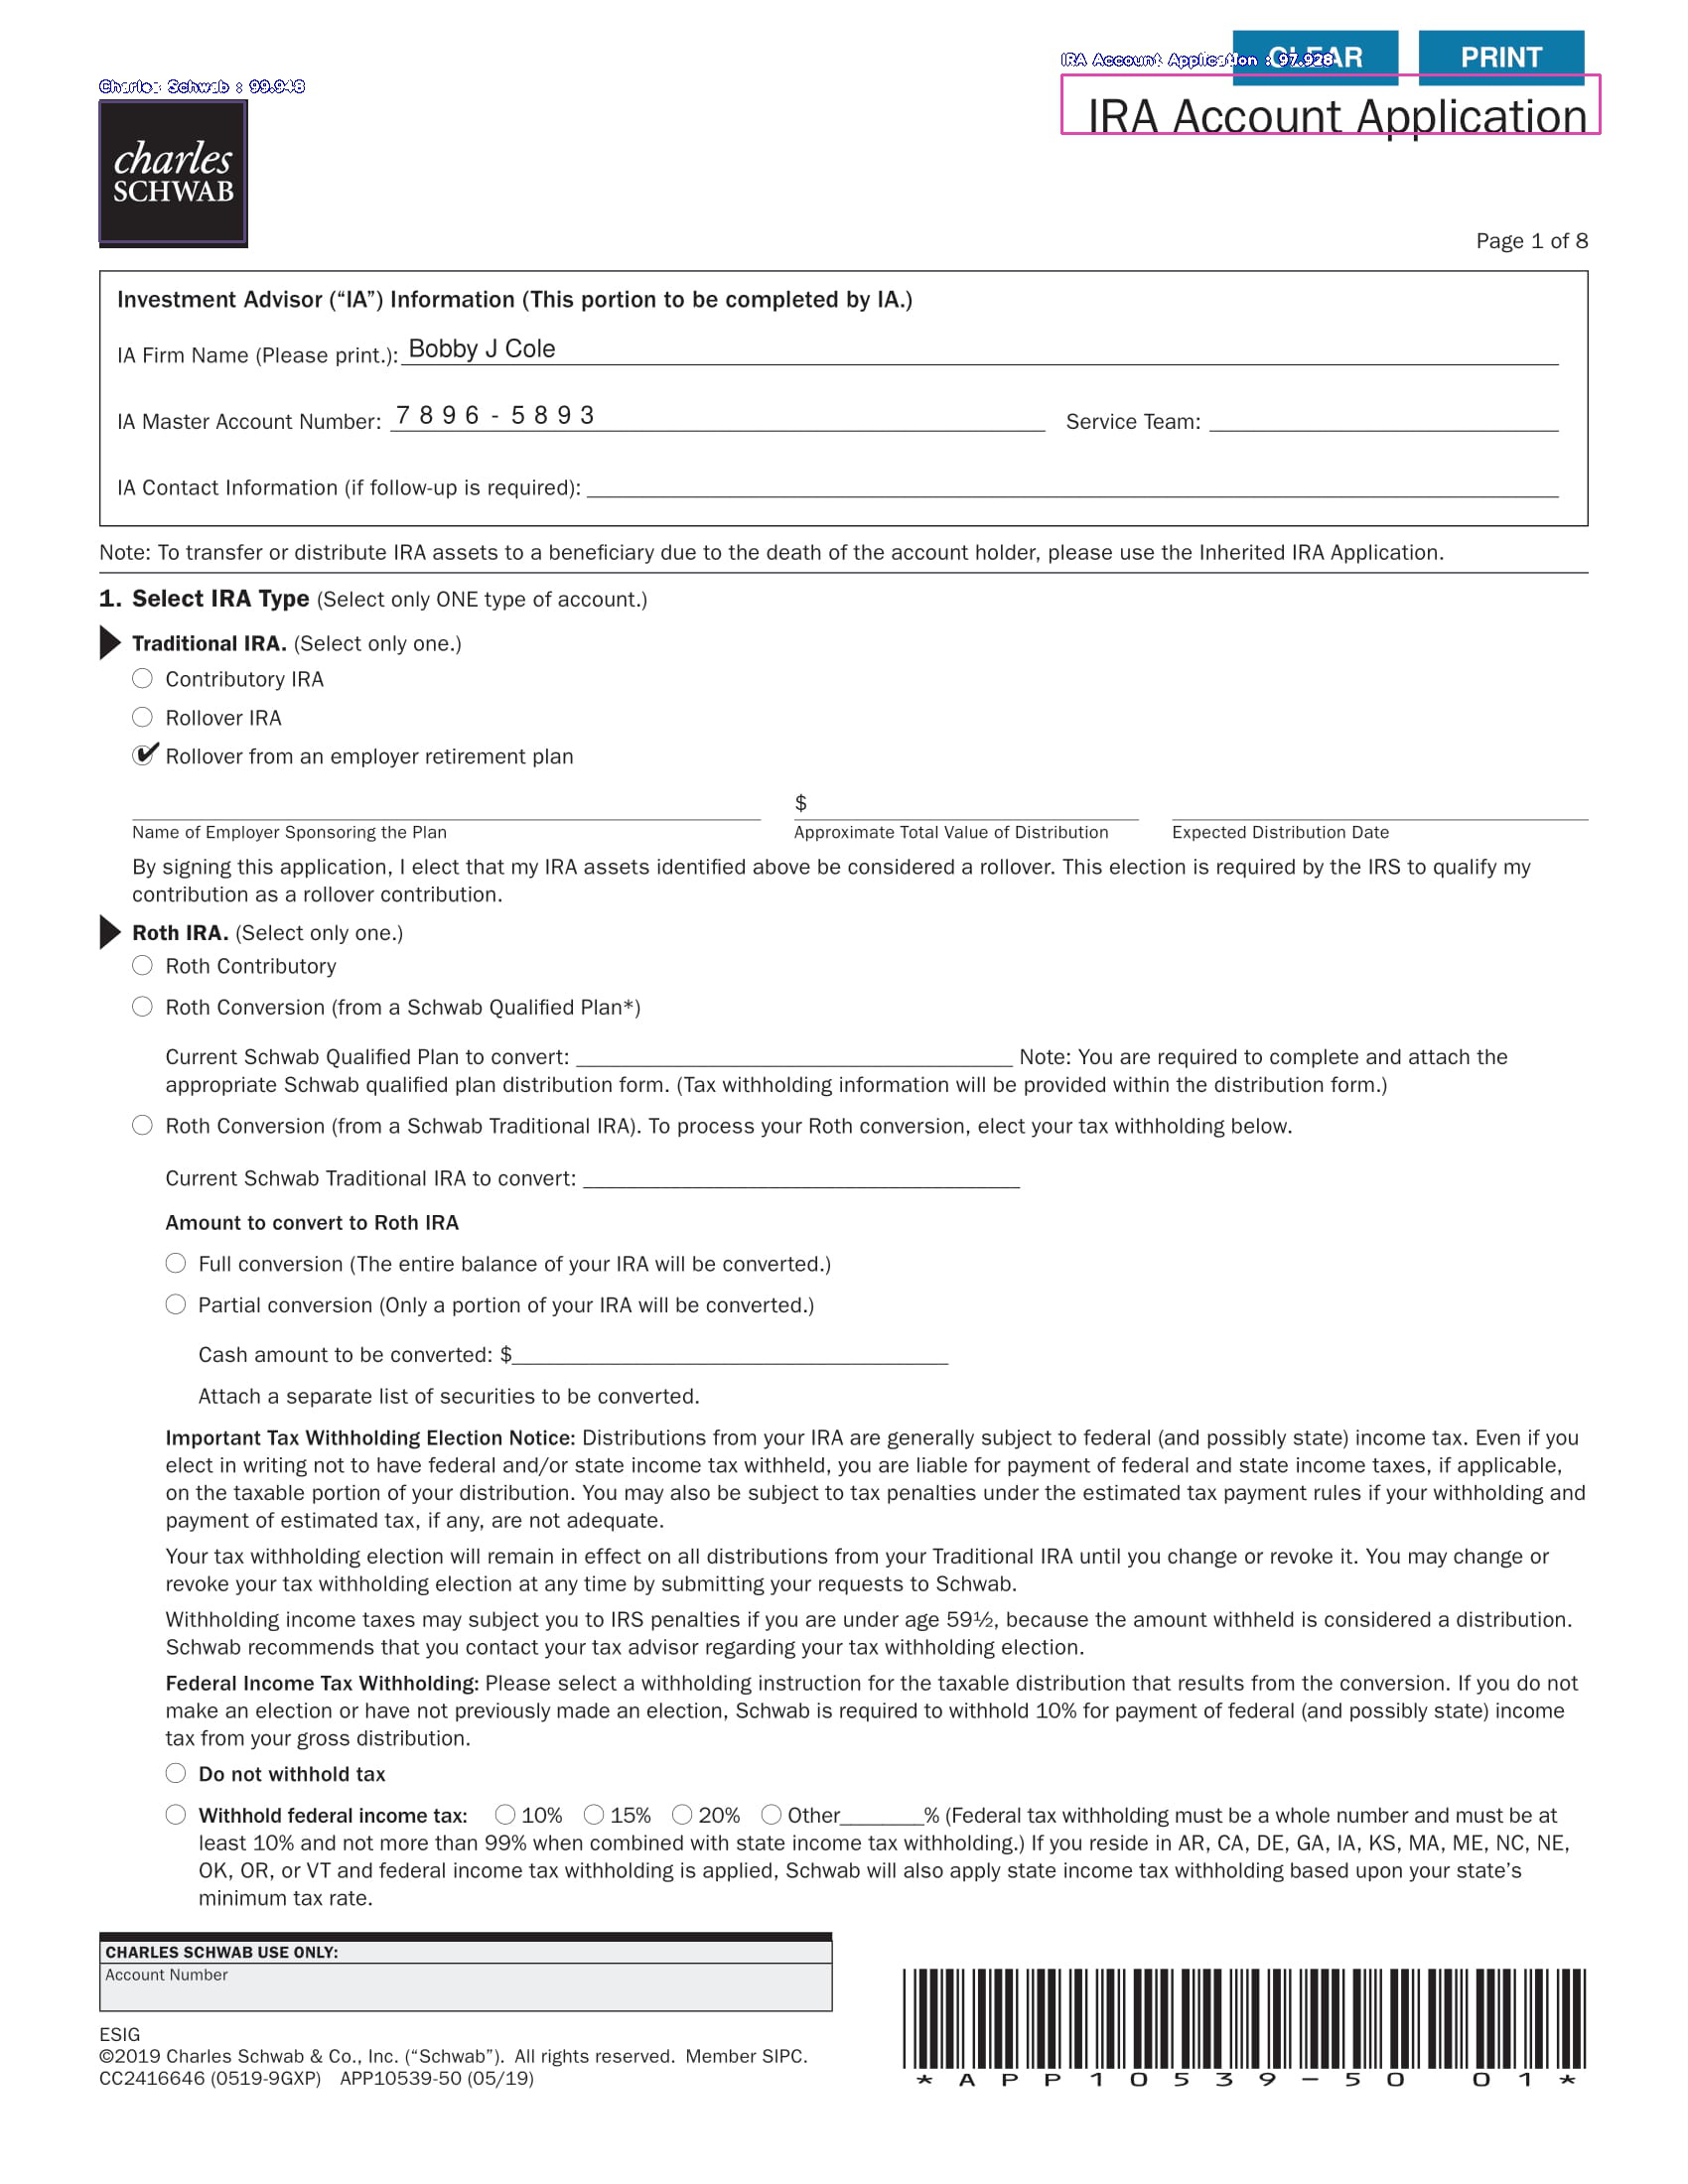

In [11]:
from PIL import Image

image = Image.open('logo_detected_image.jpg')
image.resize((216, 216))
display(image)